# T/S Plot from WOA data

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import xarray as xr
import gsw

## 1981 - 2010

In [7]:
ds_salt = xr.open_dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/Avg_Decades_1981-2010/salt')
ds_temp = xr.open_dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/Avg_Decades_1981-2010/temp')
ds = xr.merge([ds_salt, ds_temp])
ds

<xarray.Dataset>
Dimensions:  (lat: 180, lev: 102, lon: 360, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15
  * lev      (lev) float64 0.0 5.0 10.0 15.0 ... 5.2e+03 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    san      (time, lev, lat, lon) float32 ...
    smn      (time, lev, lat, lon) float32 ...
    sdd      (time, lev, lat, lon) float32 ...
    ssd      (time, lev, lat, lon) float32 ...
    sse      (time, lev, lat, lon) float32 ...
    soa      (time, lev, lat, lon) float32 ...
    sgp      (time, lev, lat, lon) float32 ...
    tan      (time, lev, lat, lon) float32 ...
    tmn      (time, lev, lat, lon) float32 ...
    tdd      (time, lev, lat, lon) float32 ...
    tsd      (time, lev, lat, lon) float32 ...
    tse      (time, lev, lat, lon) float32 ...
    toa      (time, lev, lat, lon) float32 ...
    tgp      (time, lev, lat, lon) float32 ...

### WG region

In [8]:
lower_lat = -79.88
upper_lat = -59.88
left_lon = -74.88
right_lon = 30.12

In [9]:
#set the boundaries
lat_range = dict(lat=slice(lower_lat, upper_lat))
lon_range = dict(lon=slice(left_lon, right_lon))

In [10]:
temp = ds.tan.sel(**lat_range, **lon_range)
salt = ds.san.sel(**lat_range, **lon_range)

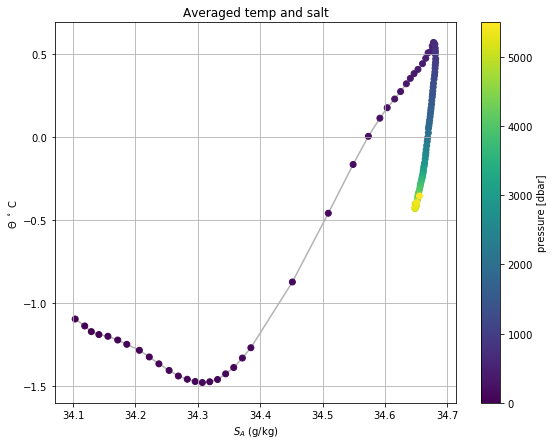

In [11]:
fig, ax = plt.subplots(figsize=(9,7))
plt.plot(salt[0].mean(dim=['lon', 'lat']), temp[0].mean(dim=['lon', 'lat']), c='0.7', zorder=-999)
scat = ax.scatter(salt[0].mean(dim=['lon', 'lat']), temp[0].mean(dim=['lon', 'lat']), c=ds.lev)
ax.set_xlabel(r'$S_A$ (g/kg)')
ax.set_ylabel(r'$\Theta$ $^\circ$ C')
plt.colorbar(scat, label='pressure [dbar]')
plt.grid()
plt.title('Averaged temp and salt');

In [12]:
xdimension_salt = np.arange(33.13249969,34.86949921,0.1)
ydimension_temp = np.arange(-2.08280993,3.91970992,0.2)

print(np.shape(ydimension_temp), np.shape(xdimension_salt))

(31,) (18,)


In [13]:
sigma = np.empty([18,31])
for j in range(18):
    for i in range(31):
        sigma[j, i] = gsw.sigma2(xdimension_salt[j],ydimension_temp[i])

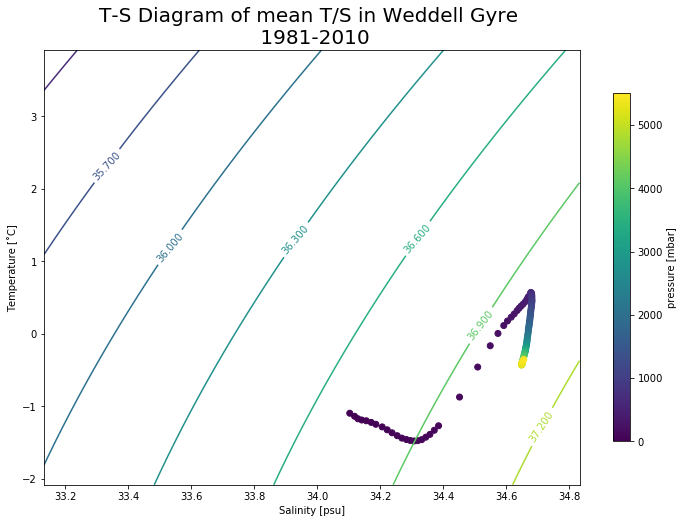

In [14]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

C = plt.contour(xdimension_salt, ydimension_temp, sigma.T)
plt.clabel(C)
scat = ax.scatter(salt[0].mean(dim=['lat', 'lon']), temp[0].mean(dim=['lat', 'lon']), c=ds.lev)
plt.colorbar(scat, label='pressure [mbar]', shrink=0.8)

ax.set_xlabel('Salinity [psu]')
ax.set_ylabel('Temperature [˚C]')
ax.set_title('T-S Diagram of mean T/S in Weddell Gyre \n 1981-2010', fontsize=20);

In [15]:
ds_wg = ds.sel(**lat_range, **lon_range)

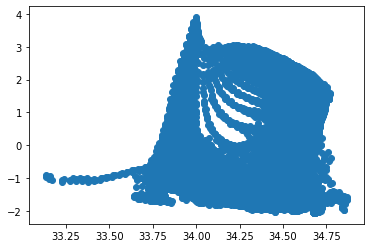

In [16]:
#setting up every data-point to be plotted on TS-diagram
salinity_vector = 1
temp_vector = 1
for i in range(len(ds_wg.lat)):
    for j in range(len(ds_wg.lon)):
        salinity_vector = np.append(salinity_vector, salt[0, :, i, j])
        temp_vector = np.append(temp_vector, temp[0, :, i, j])

Salt = salinity_vector[1:]
Temp = temp_vector[1:]

plt.scatter(Salt, Temp)

In [17]:
lev_vector = 1
for i in range(int((len(Salt)/102))):
    lev_vector = np.append(lev_vector, ds_wg.lev)
    
lev = lev_vector[1:]

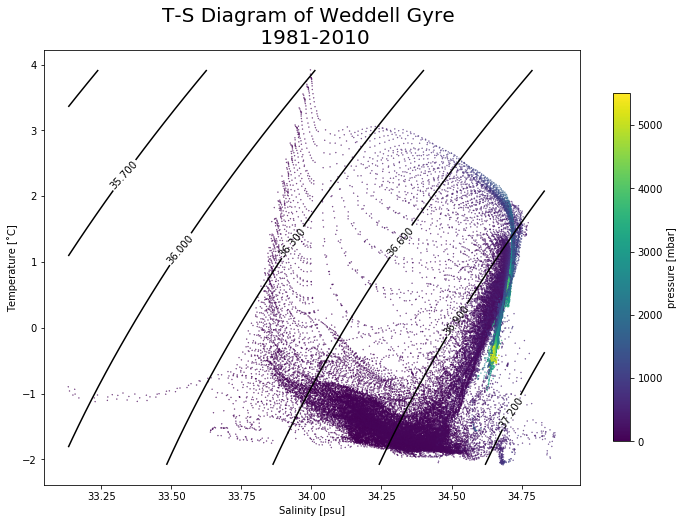

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

C = plt.contour(xdimension_salt, ydimension_temp, sigma.T, colors='k')
plt.clabel(C)

#scat = ax.scatter(Salt, Temp, c=ds.lev)
scat = ax.scatter(Salt, Temp, c = lev, marker='.', s=0.5)
plt.colorbar(scat, label='pressure [mbar]', shrink=0.8)

ax.set_xlabel('Salinity [psu]')
ax.set_ylabel('Temperature [˚C]')
ax.set_title('T-S Diagram of Weddell Gyre \n 1981-2010', fontsize=20);

In [19]:
type(Salt)

numpy.ndarray

## 2005 - 2017 

In [22]:
ds_salt_0517 = xr.open_dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/2005-2017/salt')
ds_temp_0517 = xr.open_dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/2005-2017/temp')
ds_0517 = xr.merge([ds_salt_0517, ds_temp_0517])
ds_0517

<xarray.Dataset>
Dimensions:  (lat: 180, lev: 102, lon: 360, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15
  * lev      (lev) float64 0.0 5.0 10.0 15.0 ... 5.2e+03 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    san      (time, lev, lat, lon) float32 ...
    smn      (time, lev, lat, lon) float32 ...
    sdd      (time, lev, lat, lon) float32 ...
    ssd      (time, lev, lat, lon) float32 ...
    sse      (time, lev, lat, lon) float32 ...
    soa      (time, lev, lat, lon) float32 ...
    sgp      (time, lev, lat, lon) float32 ...
    tan      (time, lev, lat, lon) float32 ...
    tmn      (time, lev, lat, lon) float32 ...
    tdd      (time, lev, lat, lon) float32 ...
    tsd      (time, lev, lat, lon) float32 ...
    tse      (time, lev, lat, lon) float32 ...
    toa      (time, lev, lat, lon) float32 ...
    tgp      (time, lev, lat, lon) float32 ...

In [24]:
temp_0517 = ds_0517.tan.sel(**lat_range, **lon_range)
salt_0517 = ds_0517.san.sel(**lat_range, **lon_range)

In [31]:
xdim_salt = np.arange(33.21761322, 34.86741257, 0.1)
ydim_temp = np.arange(-2.0733099, 3.52328992, 0.1)

print(ydim_temp.shape, xdim_salt.shape)

(56,) (17,)


In [30]:
ydim_temp.shape

(56,)

In [32]:
sigma_0517 = np.empty([17, 56])
for j in range(17):
    for i in range(56):
        sigma_0517[j, i] = gsw.sigma2(xdim_salt[j],ydim_temp[i])

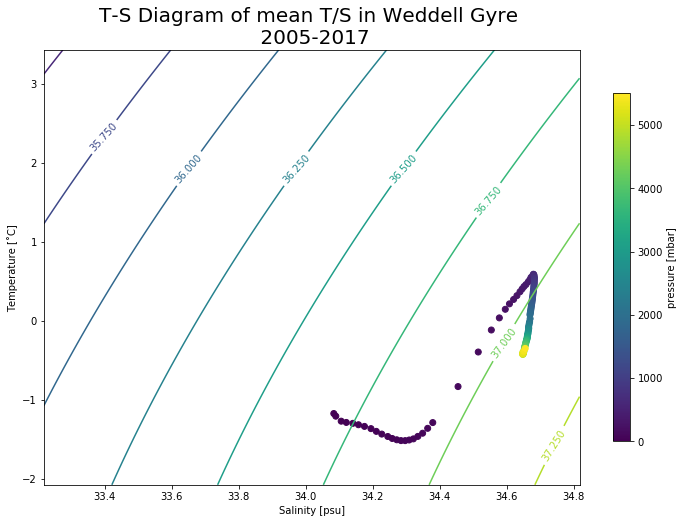

In [33]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

C_0517 = plt.contour(xdim_salt, ydim_temp, sigma_0517.T)
plt.clabel(C_0517)
scat_0517 = ax.scatter(salt_0517[0].mean(dim=['lat', 'lon']), temp_0517[0].mean(dim=['lat', 'lon']), c=ds_0517.lev)
plt.colorbar(scat_0517, label='pressure [mbar]', shrink=0.8)

ax.set_xlabel('Salinity [psu]')
ax.set_ylabel('Temperature [˚C]')
ax.set_title('T-S Diagram of mean T/S in Weddell Gyre \n 2005-2017', fontsize=20);

### Plotting for every grid point

In [34]:
ds_wg_0517 = ds_0517.sel(**lat_range, **lon_range)

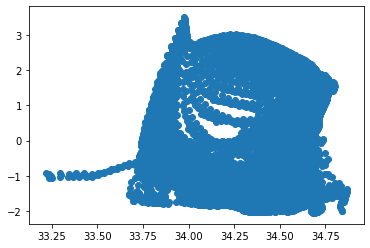

In [35]:
#setting up every data-point to be plotted on TS-diagram
salinity_vector_0517 = 1
temp_vector_0517 = 1
for i in range(len(ds_wg_0517.lat)):
    for j in range(len(ds_wg_0517.lon)):
        salinity_vector_0517 = np.append(salinity_vector_0517, salt_0517[0, :, i, j])
        temp_vector_0517 = np.append(temp_vector_0517, temp_0517[0, :, i, j])

Salt_0517 = salinity_vector_0517[1:]
Temp_0517 = temp_vector_0517[1:]

plt.scatter(Salt_0517, Temp_0517)

In [36]:
lev_vector_0517 = 1
for i in range(int((len(Salt_0517)/102))):
    lev_vector_0517 = np.append(lev_vector_0517, ds_wg_0517.lev)
    
lev_0517 = lev_vector_0517[1:]

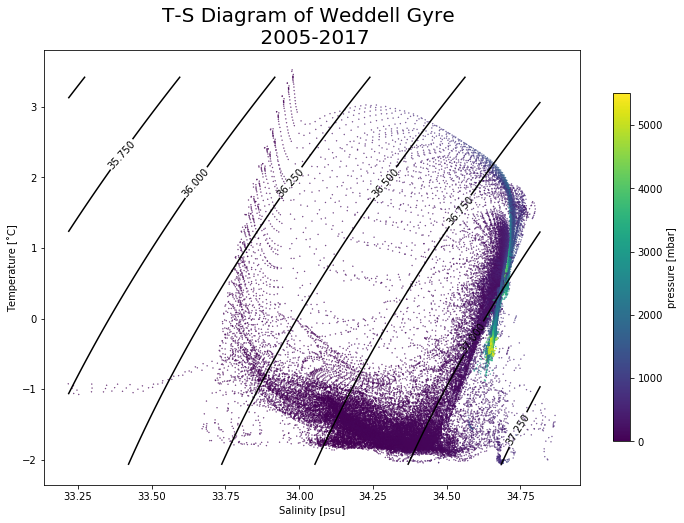

In [37]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

C_0517 = plt.contour(xdim_salt, ydim_temp, sigma_0517.T, colors='k')
plt.clabel(C_0517)

#scat = ax.scatter(Salt, Temp, c=ds.lev)
scat_0517 = ax.scatter(Salt_0517, Temp_0517, c = lev_0517, marker='.', s=0.5)
plt.colorbar(scat_0517, label='pressure [mbar]', shrink=0.8)

ax.set_xlabel('Salinity [psu]')
ax.set_ylabel('Temperature [˚C]')
ax.set_title('T-S Diagram of Weddell Gyre \n 2005-2017', fontsize=20);